---
title: "Boosting Comparison"
description: "AdaBoost vs. Gradient Boosting in Python"
date: 2024-08-18
categories: [boosting, machine-learning, gradient-boosting, ada-boosting, sklearn]
---

### Table of Contents
1. [Introduction](#introduction)
2. [AdaBoost](#adaboost)
3. [GradientBoost](#gradientboost)
4. [Visualization of Feature Importance](#visualization)
5. [Conclusion](#conclusion)

### Introduction{#introduction}
Boosting algorithms are a powerful class of ensemble methods that build models sequentially, with each new model attempting to correct the errors of its predecessor. Two of the most famous boosting algorithms are AdaBoost and Gradient Boosting. While they share a common philosophy, they differ in a crucial way: how they correct the previous errors.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import sklearn 
from sklearn import metrics 
from sklearn.datasets import load_iris
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt 

Here, we load iris dataset, to implement both of the boosting algorithm to check the performance.

In [3]:
iris = load_iris()
iris_df = data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
87,6.3,2.3,4.4,1.3,1.0
38,4.4,3.0,1.3,0.2,0.0
57,4.9,2.4,3.3,1.0,1.0
43,5.0,3.5,1.6,0.6,0.0
122,7.7,2.8,6.7,2.0,2.0
84,5.4,3.0,4.5,1.5,1.0
72,6.3,2.5,4.9,1.5,1.0
49,5.0,3.3,1.4,0.2,0.0
51,6.4,3.2,4.5,1.5,1.0
95,5.7,3.0,4.2,1.2,1.0


In [4]:
X = iris_df.drop(['target'], axis=1)
Y = iris_df['target']
feature_names = iris_df.columns.values.tolist()[:-1]
class_names = Y.unique().tolist()
print(feature_names)
print(class_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.0, 1.0, 2.0]


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [6]:
def single_y_test_pred(y_test, y_pred) -> pd.DataFrame:
    return pd.concat(
        [y_test.reset_index(), pd.DataFrame({"y_pred": y_pred})], axis=1
    )

### AdaBoost{#adaboost}
AdaBoost works by focusing on the mistakes. In each iteration, it increases the weights of the data points that the previous model misclassified. This forces the next model to pay more attention to these 'hard' examples.

In [7]:
ada = sklearn.ensemble.AdaBoostClassifier()
print(ada) 
ada = ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)

# print(single_y_test_pred(y_test, y_pred))

print(sklearn.metrics.classification_report(y_test, y_pred))

print("Confusion matrix:")
print(sklearn.metrics.confusion_matrix(y_test, y_pred, labels=class_names))

accuracy_test = metrics.accuracy_score(y_test, y_pred) * 100
accuracy_train = metrics.accuracy_score(y_train, ada.predict(x_train)) * 100

print(f"Accuracy: {round(accuracy_test, 2)}% on Test Data")
print(f"Accuracy: {round(accuracy_train, 2)}% on Training Data")

print(ada.score(x_test, y_test))

feature_imp_ada = pd.Series(ada.feature_importances_, index=feature_names)
print(feature_imp_ada)

AdaBoostClassifier()
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.83      0.91        12
         2.0       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30

Confusion matrix:
[[10  0  0]
 [ 0 10  2]
 [ 0  0  8]]
Accuracy: 93.33% on Test Data
Accuracy: 100.0% on Training Data
0.9333333333333333
sepal length (cm)    0.018203
sepal width (cm)     0.095626
petal length (cm)    0.476359
petal width (cm)     0.409812
dtype: float64


AdaBoost achieved an accuracy of **93%** on the test set. The classification report shows it performs perfectly on class 0, but occasionally confuses the other classes. From the feature importance scores, we see that AdaBoost considers petal length and petal width to be almost equally important, with sepal width to be somewhat important too for making its decisions.

### Gradient Boosting{#gradientboost}
Gradient Boosting takes a more generalized approach. Instead of adjusting the weights of data points, each new weak learner is trained to predict the residuals (the errors) of the previous model. It uses gradient descent to minimize the loss function of the overall model.

In [8]:
gb = GradientBoostingClassifier()
print(gb) 
gb = gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

# print(single_y_test_pred(y_test, y_pred))

print(sklearn.metrics.classification_report(y_test, y_pred))

print("Confusion matrix:")
print(sklearn.metrics.confusion_matrix(y_test, y_pred, labels=class_names))

accuracy_test = metrics.accuracy_score(y_test, y_pred) * 100
accuracy_train = metrics.accuracy_score(y_train, gb.predict(x_train)) * 100

print(f"Accuracy: {round(accuracy_test, 2)}% on Test Data")
print(f"Accuracy: {round(accuracy_train, 2)}% on Training Data")

print(gb.score(x_test, y_test))

feature_imp_gb = pd.Series(gb.feature_importances_, index=feature_names)
print(feature_imp_gb)

GradientBoostingClassifier()
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.91      0.83      0.87        12
         2.0       0.78      0.88      0.82         8

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Confusion matrix:
[[10  0  0]
 [ 0 10  2]
 [ 0  1  7]]
Accuracy: 90.0% on Test Data
Accuracy: 100.0% on Training Data
0.9
sepal length (cm)    0.000849
sepal width (cm)     0.014108
petal length (cm)    0.443576
petal width (cm)     0.541467
dtype: float64


Interestingly, Gradient Boosting scored 90% accuracy. However, its view of the data is quite different. The feature importance plot shows that it relies heavily on petal width (almost 55% importance), giving much less weight to the sepal width in comparison to AdaBoost. This depicts a fundamental difference in how the algorithms learn.

### Visualization of both models{#visualization}

Here, we visualize the feature importances for both boosting methods, to capture subtle differences in their performance.

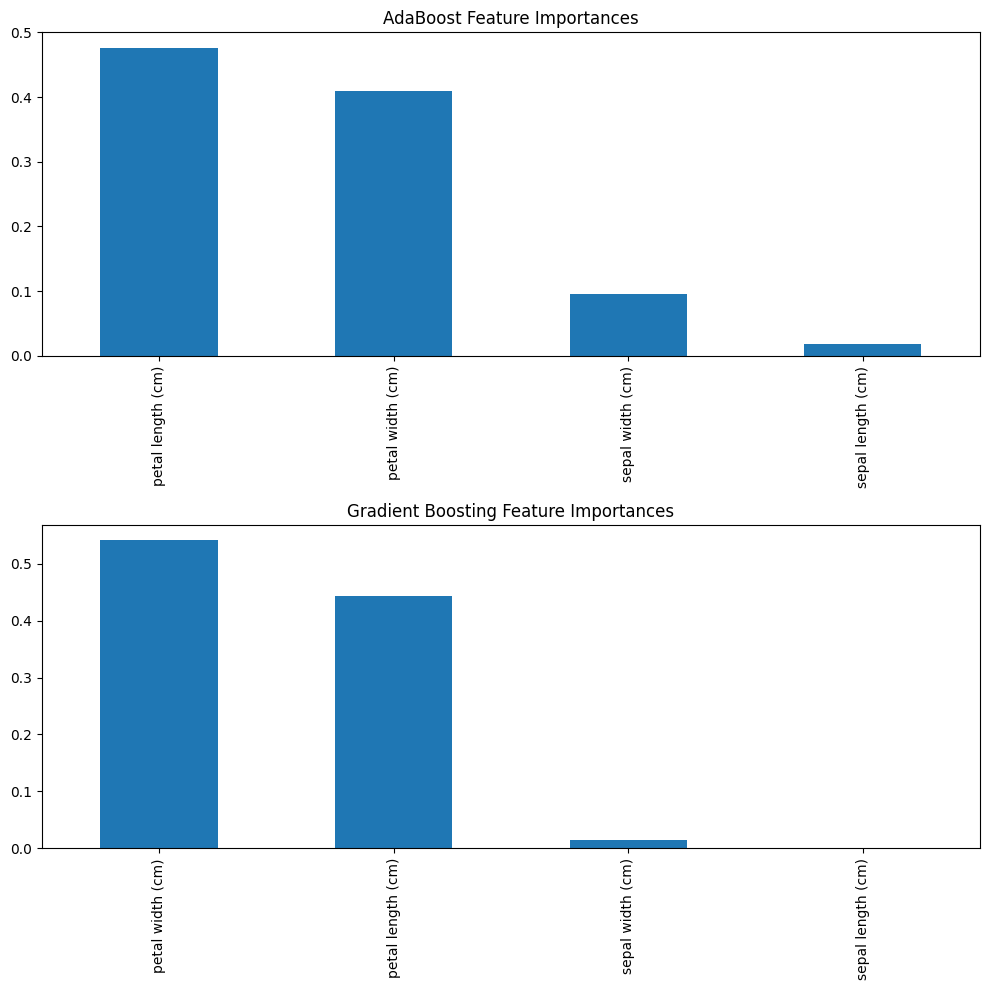

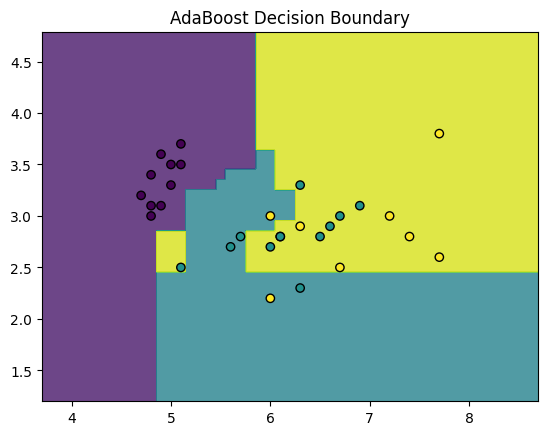

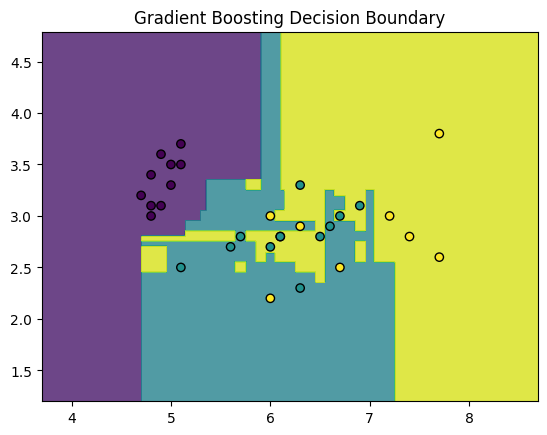

In [10]:
# Visualize Feature Importances
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
feature_imp_ada.sort_values(ascending=False).plot(kind='bar', ax=axs[0], title='AdaBoost Feature Importances')
feature_imp_gb.sort_values(ascending=False).plot(kind='bar', ax=axs[1], title='Gradient Boosting Feature Importances')
plt.tight_layout()
plt.show()

# Visualize Decision Boundaries

def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.show()

# 2 features
X_vis_train = x_train.iloc[:, :2]
X_vis_test = x_test.iloc[:, :2]

# Train models with only the first two features for visualization
ada_vis = sklearn.ensemble.AdaBoostClassifier()
ada_vis.fit(X_vis_train, y_train)
gb_vis = GradientBoostingClassifier()
gb_vis.fit(X_vis_train, y_train)

plot_decision_boundaries(X_vis_test, y_test, ada_vis, "AdaBoost Decision Boundary")
plot_decision_boundaries(X_vis_test, y_test, gb_vis, "Gradient Boosting Decision Boundary")

### Conclusion{#conclusion}
On a simple dataset like Iris, both AdaBoost and Gradient Boosting can perform very well. The key takeaway is their different strategies: AdaBoost focuses on misclassified points, while Gradient Boosting focuses on minimizing overall error. Gradient Boosting is often more powerful and flexible, but AdaBoost is a fantastic algorithm for understanding the core principles of boosting.